In [8]:
from tensorflow.keras import layers, models, optimizers

hybrid_model = models.Sequential()

hybrid_model.add(layers.Input(shape=(28, 28, 1)))
hybrid_model.add(layers.Conv2D(32, (4, 4), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))

hybrid_model.add(layers.Conv2D(64, (4, 4)))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Conv2D(32, (4, 4), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Reshape(target_shape=(-1, 64)))

hybrid_model.add(layers.LSTM(128, return_sequences=True))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.LSTM(64, return_sequences=False))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Dense(256))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.Dropout(0.5))

hybrid_model.add(layers.Dense(47, activation='softmax'))

hybrid_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

hybrid_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 18, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │        12,079 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,119 (949.68 KB)

 Trainable params: 243,119 (949.68 KB)

 Non-trainable params: 0 (0.00 B)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.7SQBQY_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.7SQBQY_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.
Batch images shape: (128, 28, 28, 1)
Batch labels shape: (128, 47)


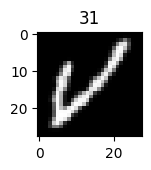

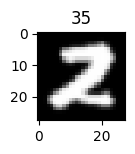

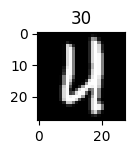

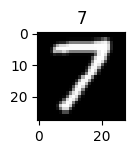

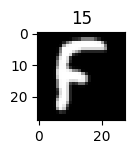

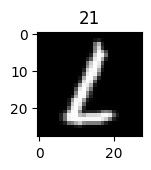

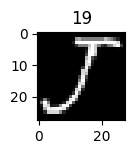

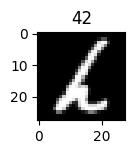

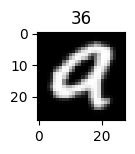

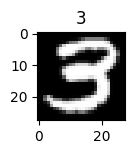

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def preprocess(image, label):
    image = tf.transpose(image)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))
    label = tf.one_hot(label, depth=47)
    return image, label
ds_train = ds_train.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
for images, labels in ds_train.take(1):
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
#print the images

import matplotlib.pyplot as plt

for image,label in ds_train.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().squeeze(),cmap='gray')
        plt.title(np.argmax(label[i],axis=0))
        plt.tight_layout()
        plt.show()


In [4]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3,min_delta=0.001)
history = hybrid_model.fit(ds_train,epochs=15,batch_size=64,validation_data=ds_test,callbacks=early_stopping)

Epoch 1/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.3071 - loss: 2.4312 - val_accuracy: 0.7968 - val_loss: 0.6059
Epoch 2/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.7823 - loss: 0.6746 - val_accuracy: 0.8452 - val_loss: 0.4518
Epoch 3/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8278 - loss: 0.5192 - val_accuracy: 0.8598 - val_loss: 0.3960
Epoch 4/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8471 - loss: 0.4556 - val_accuracy: 0.8668 - val_loss: 0.3907
Epoch 5/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8577 - loss: 0.4194 - val_accuracy: 0.8747 - val_loss: 0.3583
Epoch 6/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8629 - loss: 0.4000 - val_accuracy: 0.8808 - val_loss: 0.3453
Epoch 7/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8685 - loss: 0.3809 - val_accuracy: 0.8775 - val_loss: 0.3510
Epoch 8/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8709 - loss: 0.3722 - 

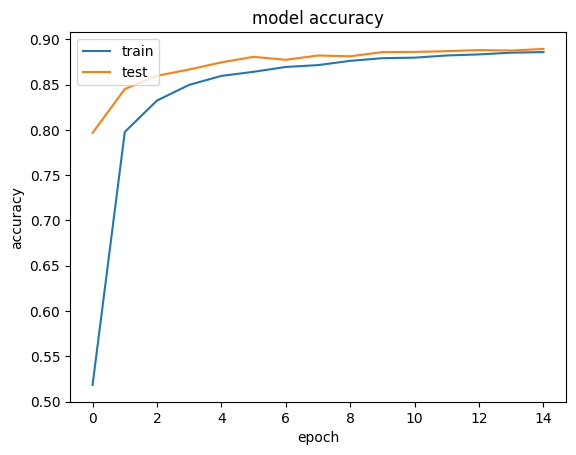

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

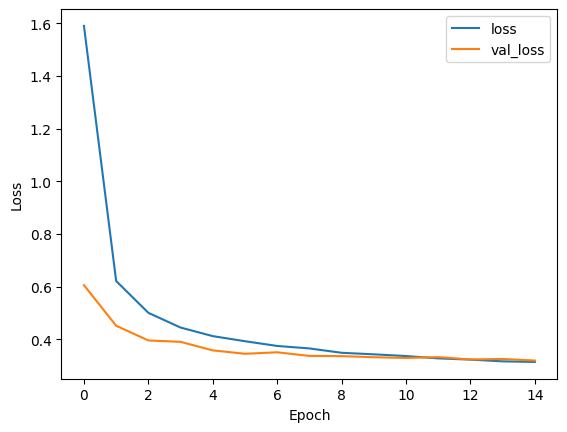

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
hybrid_model.save('new_hybrid_model.keras')